# Classification. Logistic Regression & SVM model

Цель практики: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.\
Описание задания:\
Необходимо решить задачу классификации физических лиц по уровню дохода. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K.  Бинарная классификация. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.\
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("D:/GITHUB/ML_lessons/Datasets/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


###### Проверяем категореальные колонки на корректность данных

In [5]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [7]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [8]:
# Очищаем датафрейм от строк с отсутствующими данными
df = df.loc[(df['workclass']!='?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## Построим гистограммы числовых параметров

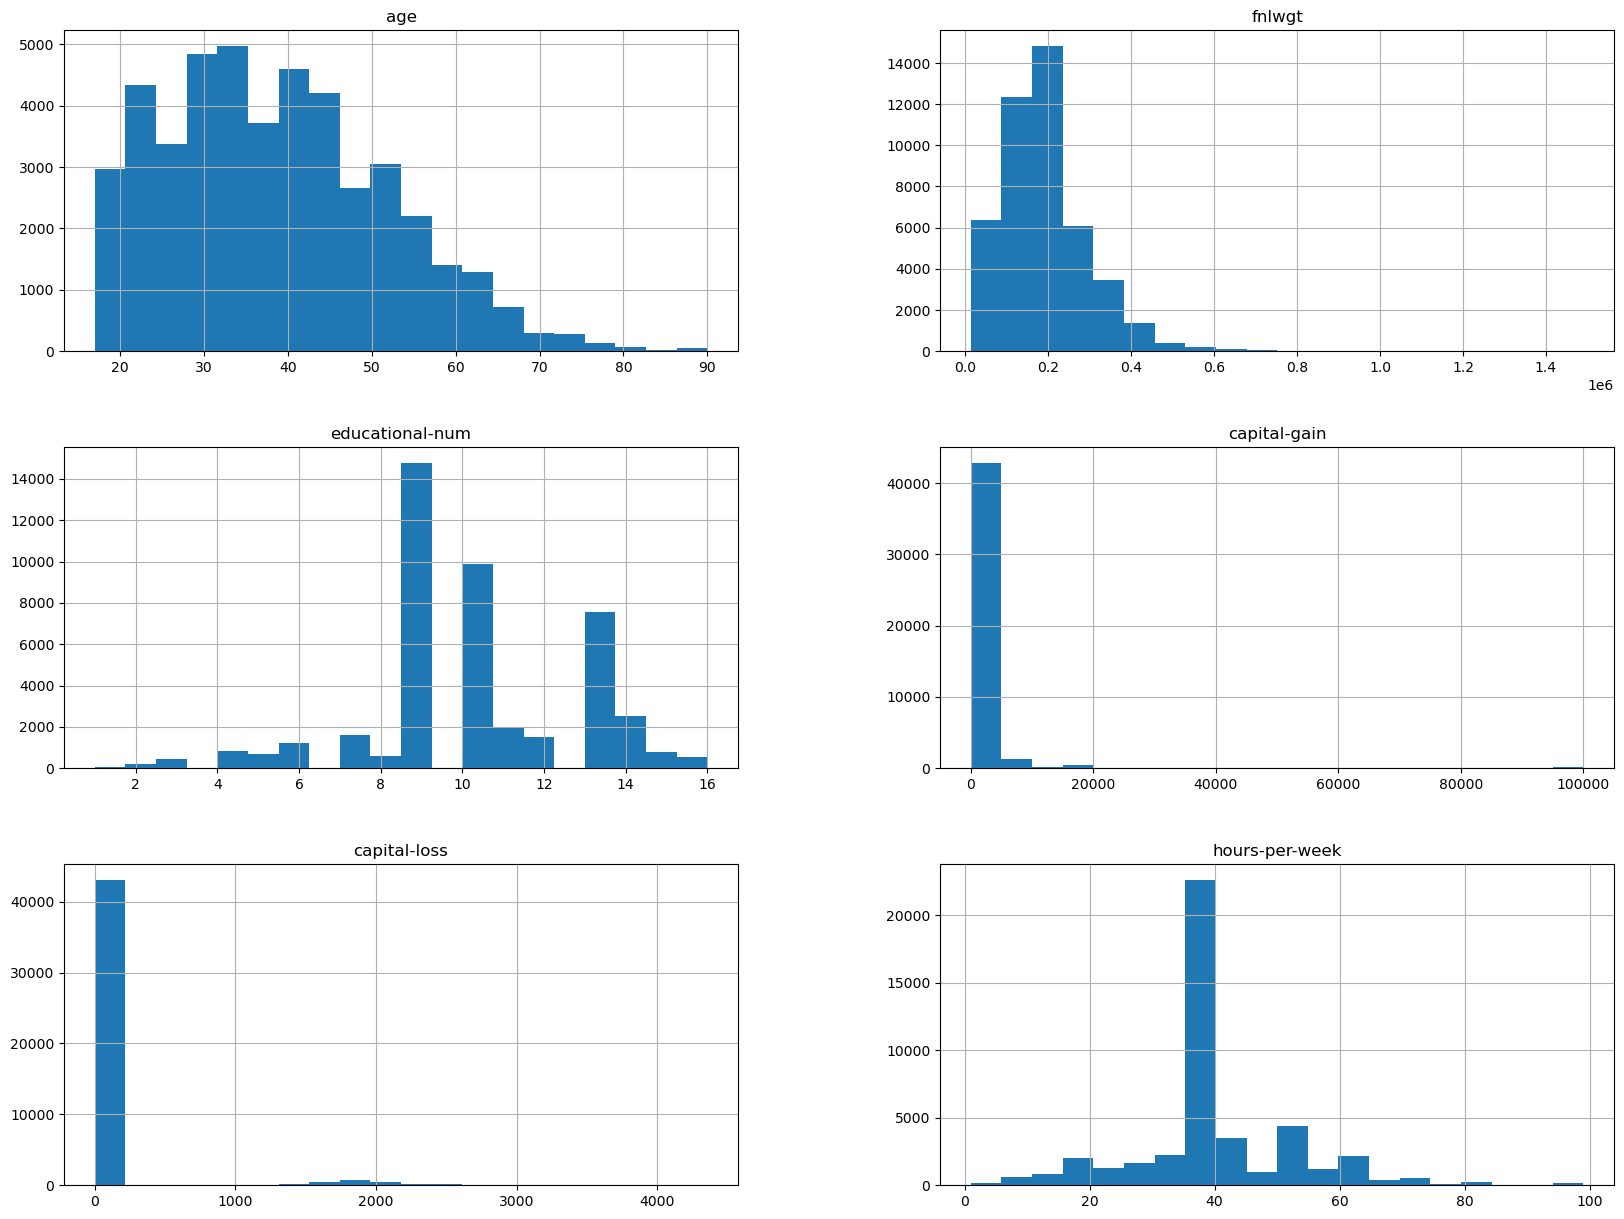

In [10]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

 ## Рассмотрим влияние некоторых числовых параметров на уровень дохода

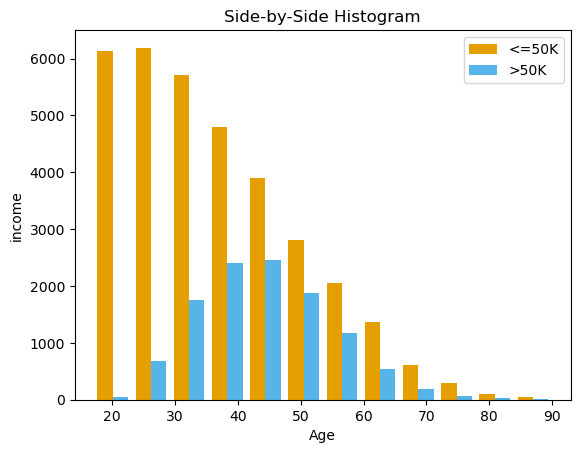

In [11]:
x1 = list(df[df['income'] == '<=50K']['age'])
x2 = list(df[df['income'] == '>50K']['age'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

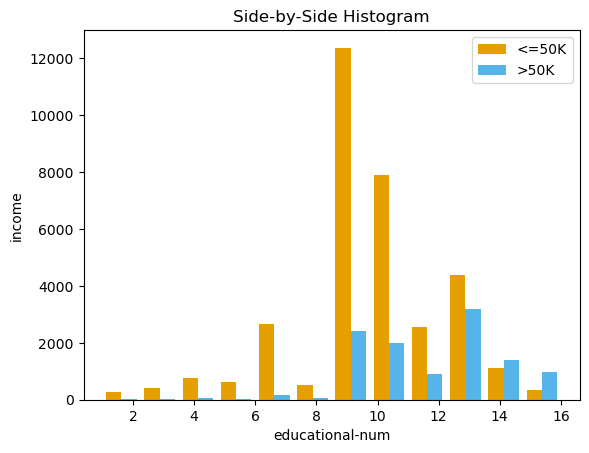

In [12]:
x1 = list(df[df['income'] == '<=50K']['educational-num'])
x2 = list(df[df['income'] == '>50K']['educational-num'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('educational-num')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()


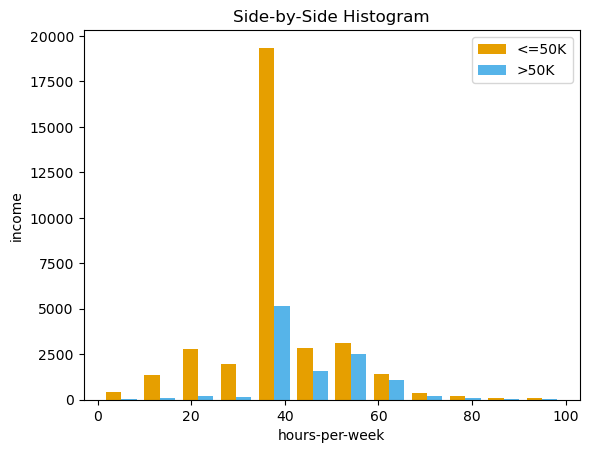

In [13]:
x1 = list(df[df['income'] == '<=50K']['hours-per-week'])
x2 = list(df[df['income'] == '>50K']['hours-per-week'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('hours-per-week')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

Четко прослеживается зависимость увеличения дохода в зависимости от возраста: в активной фазе жизни (от 30-ти до 55) люди зарабатывают больше. Также видна четкая зависимость от уровня образования. От количества часов работы в неделю зависимость не слишком явная. Не будем этот критерий использовать в модели. 

In [14]:
from sklearn.linear_model import LogisticRegression

#### Выберем данные для модели .

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'relationship',\
                              'race', 'gender', 'native-country']])

In [18]:
X.head()

,age,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['income'])

LabelEncoder()

In [21]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [22]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [23]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#### Обучим модель .
Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [27]:
model.score(X_train, y_train)

0.8267683887552865

In [28]:
model.score(X_test,y_test)

0.8290768380320619

### Обучим модель по методу опорных Векторов SVM

In [29]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [30]:
clf.score(X_train, y_train)

0.8293943665865052

In [31]:
clf.score(X_test, y_test)

0.8233278054173576

#### Сравнивая две модели: точность предсказания сопоставимая. Модель SVM затрачивает больше ресурсов (вычислительная мощность, время) 

### Попробуем повысить точность предсказания, добавив в выборку дополнительные параметры

In [32]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'marital-status','relationship',\
                              'race', 'gender','capital-gain', 'capital-loss', 'native-country']])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [35]:
model.score(X_train, y_train)

0.8461729828343976

In [36]:
model.score(X_test,y_test)

0.8476506357103372

#### Подтвердилась гипотеза, что время работы в неделю не сильно влияет на уровень дохода: при добавлении критерия 'hours-per-week' точность предсказания меняется незначительно. 

#### Повысить точность предсказания 1,7% удалось при добавлении критериев: 'marital-status', 'capital-gain', 'capital-loss'

# Loss functions and optimization

Цель практики: изучить применение методов оптимизации для решения задачи классификации
1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [37]:
import pandas as pd
import numpy as np
import scipy.stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
# Формируем датафрейм, искдючаем таргет = 0 'sertosa', преобразуем признаки из 1 и 2 в 0 и 1
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df_iris = df_iris[(df_iris['target'] !=0)]
df_iris['target'][(df_iris['target'] ==1)] = 0
df_iris['target'][(df_iris['target'] ==2)] = 1

In [43]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0


In [44]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [45]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Реализация Логистической Регрессии Градиентный спуск

In [47]:
# Расчёт логистической функции
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [48]:
# Расчёт функции потерь на основе бинарной кросс-энтропии
def loss(predict, y):
    return ((-y) * np.log(predict) - (1 - y) * np.log(1 - predict)).mean()

In [49]:
def transposition(X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

In [50]:
# Предсказание вероятности
def predict_proba(X, theta, fit_intercept=True):
    if len(theta) - 1 == X.shape[1]:
        transposition(X)
    z = np.dot(X, theta)
    return sigmoid(z)

In [51]:
# Предсказание класса на основе вероятностей
def predict(prediction_proba, rate=0.5):
    return np.asarray([0 if x < rate else 1 for x in prediction_proba])

In [52]:
# Градиентный спуск
def lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    for i in range(max_iter):

        prediction = predict_proba(X, theta) # Предсказание значений
        gradient = np.dot(X.T, (prediction - y)) / y.size # Рассчёт градиента
        theta -= learning_rate * gradient # Сдвиг оценки коэффициентов
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
        
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction

In [53]:
import time

In [54]:
start_time = time.time()
hand_model = lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
end_time = time.time() - start_time
hand_predict = predict(predict_proba(X_test,hand_model[0]))
hand_score = accuracy_score(y_test, hand_predict)
print(f'Время работы градиентный спуск = {end_time:.3f}')
print(f'Точность предсказания = {hand_score}')

Время работы градиентный спуск = 0.053
Точность предсказания = 0.95


### Логистическая регрессия метод скользящего среднего (Root Mean Square Propagation, RMSProp)

In [55]:
def rmsprop_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, decay_rate=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    
    cache=np.zeros(X.shape[1])
    caches=[]
    for i in range(max_iter):
        prediction = predict_proba(X,theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        
        cache = decay_rate * cache+ (1 - decay_rate) * gradient**2
        caches.append(cache)
       
        theta += -learning_rate * gradient / (np.sqrt(cache) + eps)
       
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, caches

In [56]:
start_time = time.time()
rmsprop_model = rmsprop_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
rmsprop_end_time = time.time() - start_time
rmsprop_predict = predict(predict_proba(X_test, rmsprop_model[0]))
rmsprop_score = accuracy_score(y_test, rmsprop_predict)
print(f'Время работы реализации RMSProp = {rmsprop_end_time:.3f}')
print(f'Точность предсказания = {rmsprop_score}')

Время работы реализации RMSProp = 0.049
Точность предсказания = 0.85


### Логистическая регрессия по Нестерову метод адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam)

In [57]:
def nadam_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, gamma=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    v=0
    vs=[]
    for i in range(max_iter):
        prediction=predict_proba(X, theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        v = gamma * v - learning_rate * gradient
        
        vs.append(v)
        theta += v
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, vs

In [58]:
start_time = time.time()
nadam_model = nadam_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
nadam_end_time = time.time() - start_time
nadam_predict = predict(predict_proba(X_test, nadam_model[0]))
nadam_score = accuracy_score(y_test, nadam_predict)
print(f'Время работы реализации NADAM = {nadam_end_time:.3f}')
print(f'Точность предсказания = {nadam_score}')

Время работы реализации NADAM = 0.050
Точность предсказания = 0.9


### Логистическая регрессия библиотека Sklearn

In [59]:
lr = LogisticRegression(max_iter=100, tol=0.05)

In [60]:
start_time = time.time()
lr.fit(X_train, y_train)
lib_end_time = time.time() - start_time
lib_predict = lr.predict(X_test)
lib_score = accuracy_score(y_test, lib_predict)
print(f'Время работы sklearn LogisticRegression = {lib_end_time:.3f}')
print(f'Точность предсказания = {lib_score}')

Время работы sklearn LogisticRegression = 0.008
Точность предсказания = 0.95


### Вывод:
Проведена оценка нескольких моделей на основании разных методов. Получены следующие результаты:

In [62]:
print(f'Градиентный спуск: accuracy_score = {hand_score}, время = {end_time:.3f}')
print(f'RMSProp Logistic Regression: accuracy_score = {rmsprop_score}, время = {rmsprop_end_time:.3f}')
print(f'Nadam Logistic Regression: accuracy_score = {nadam_score}, время = {nadam_end_time:.3f}')
print(f'Sklearn Logistic Regression: accuracy_score = {lib_score}, время = {lib_end_time:.3f}')

Градиентный спуск: accuracy_score = 0.95, время = 0.053
RMSProp Logistic Regression: accuracy_score = 0.85, время = 0.049
Nadam Logistic Regression: accuracy_score = 0.9, время = 0.050
Sklearn Logistic Regression: accuracy_score = 0.95, время = 0.008


Градиентный спуск показывает те же результаты, что и стандартная библиотека SKlearn, но работает значительно медленнее.
Методы скользящего среднего и ускоренного по Нестерову метода адаптивной оценки моментов показывают результаты ниже, по времени
сопоставимы с Градиентным спуском